Installing necessary dependancies

In [1]:
!pip install catboost

     |████████████████████████████████| 64.8MB 43kB/s 


In [2]:
!pip install -U pandas-profiling


     |████████████████████████████████| 266kB 7.2MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 604kB 13.9MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 3.1MB 35.9MB/s 
     |████████████████████████████████| 296kB 43.5MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=a3b46a0390d82208605d6901525b14798b05cc00a14ecf61d90772fca56783e2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=1485ba83e9df09133ca263bffdd6d70d67ba441008b0e4e4040a19a70df32065
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [3]:
!pip install cpi

     |████████████████████████████████| 25.5MB 119kB/s 


In [4]:
!pip install scikit-plot

In [5]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 4.1MB/s 


Importing Packages

In [6]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling 
from scipy.stats import trim_mean 
import seaborn as sns 
import plotly.express as px
import seaborn as sns
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gc
import cpi
import datetime
from datetime import datetime
import re

#run update on consumer price index
#cpi.update()

#imports for baseline xgboost model
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
import time
import random
import xgboost as xgb


# imports for Extra Trees Model
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

#imports for extra trees model tuning
from skopt import BayesSearchCV
from sklearn.ensemble import ExtraTreesRegressor

#imports for extra trees model after tuning
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt


#Baseline XGB Training with Feature Selection
from sklearn.feature_selection import SelectFromModel

#Light LGBM Boosting
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

#Catboost Library
from catboost import Pool, CatBoostRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/cpi/__init__.py:46: StaleDataWarning:

CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.



Load Dataset

In [7]:
#load dataset and 
df = pd.read_csv('/content/Movie_data.csv')

In [8]:
df

title  ...    status
0             Double Impact  ...  Released
1           Call + Response  ...  Released
2           How Do You Know  ...  Released
3     In the Valley of Elah  ...  Released
4                 Dark Blue  ...  Released
...                     ...  ...       ...
3837   The Spy Who Loved Me  ...  Released
3838               Vacation  ...  Released
3839           Medicine Man  ...  Released
3840        Kung Fu Panda 2  ...  Released
3841        The Puffy Chair  ...  Released

[3842 rows x 16 columns]

In [9]:
def clean_train_dataset():

  #remove all null values from columns
  #did not fill in null values for for "tagline" and "posterpath" and "homepage" as values
  #needed for a plot.
  df["genres"].fillna("no genres", inplace = True)
  df["overview"].fillna("no overview", inplace = True)
  df["production_companies"].fillna("no production_companies", inplace = True)
  df["production_countries"].fillna("no production_countries", inplace = True)
  df["runtime"].fillna(0, inplace = True)
  df["spoken_languages"].fillna("no languages", inplace = True)
  df["keywords"].fillna("no keywords", inplace = True)
  df["tagline"].fillna("no tagline", inplace = True)
  df["homepage"].fillna("no homepage", inplace = True)
  df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: datetime.strftime(x, '%m/%d/%y'))
  #changes date format to month/day/year



  
  # removed row that listed movie after 2017
  #rowData = df.loc[ 187, : ]
  #df.drop(rowData, axis = 0, inplace = True)
  # extract year from release_date
  #df['release_year'] = pd.DatetimeIndex(df['release_date']).year
  
  #adjust revenue column using cpi library that takes
  #in the amount and year and adjusts prices by consumer price index to account for inflation
  #df['revenue'] = df.apply(lambda x: cpi.inflate(x.revenue, x.release_year), axis=1)

  
#call clean_dataset function
clean_train_dataset()

In [10]:
#check for null values in features
df.isnull().sum()

title                   0
tagline                 0
revenue                 0
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
overview                0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
dtype: int64

**Details** **on** **Datacleaning**

From the pandas profile that was generated, the dataset had to be cleaned before a proper EDA could be done. Some Feature/columns had "N/A", some columns had be preprocessed since the columns contained unneeded characters. Also, the US currency values in revenue column had to be adjusted for inflation using the cpi library which can be found on github.

**EDA**

In [11]:
#run pandas-profiling report function for EDA
df.profile_report()

**Dataset Statistics like Mean, IQR, Variance**

In [12]:
#using pandas decribe function 
df.describe() 

revenue        budget             id      runtime
count  3.842000e+03  3.842000e+03    3842.000000  3842.000000
mean   8.152182e+07  2.906734e+07   55912.961999   106.977616
std    1.596244e+08  4.033657e+07   87797.939462    22.720562
min    0.000000e+00  0.000000e+00       5.000000     0.000000
25%    0.000000e+00  8.506275e+05    8971.250000    94.000000
50%    1.919447e+07  1.465000e+07   14331.000000   104.000000
75%    9.452796e+07  4.000000e+07   57209.250000   117.000000
max    2.787965e+09  3.800000e+08  459488.000000   338.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 3842 non-null   object 
 1   tagline               3842 non-null   object 
 2   revenue               3842 non-null   int64  
 3   budget                3842 non-null   int64  
 4   genres                3842 non-null   object 
 5   homepage              3842 non-null   object 
 6   id                    3842 non-null   int64  
 7   keywords              3842 non-null   object 
 8   original_language     3842 non-null   object 
 9   overview              3842 non-null   object 
 10  production_companies  3842 non-null   object 
 11  production_countries  3842 non-null   object 
 12  release_date          3842 non-null   object 
 13  runtime               3842 non-null   float64
 14  spoken_languages      3842 non-null   object 
 15  status               

In [14]:
#calculate median on each feature

runtime_median = df.runtime.median() 
print ("runtime median : ", runtime_median) 

budget_median = df.budget.median() 
print ("budget median : ", budget_median) 

revenue_median = df.revenue.median() 
print ("revenue median : ", revenue_median)

runtime median :  104.0
budget median :  14650000.0
revenue median :  19194472.0


In [15]:
#calculate trimmed mean
runtime_TM = trim_mean(df.runtime, 0.1) 
print ("\nruntime trimmed mean: ", runtime_TM) 

budget_TM = trim_mean(df.budget, 0.1) 
print ("\nbudget trimmed mean: ", budget_TM) 

revenue_TM = trim_mean(df.revenue, 0.1) 
print ("\nrevenue trimmed mean: ", revenue_TM) 


runtime trimmed mean:  105.26219908913468

budget trimmed mean:  20641755.799609628

revenue trimmed mean:  44706592.856213406


In [16]:
#calculate weighted mean
revenue_WM = np.average(df.revenue, weights = df.budget) 
print ("Weighted revenue Mean (weight is budget): ", revenue_WM) 


Weighted revenue Mean (weight is budget):  241391649.0962553


In [17]:
# calculate standard deviation
runtime_std = df.runtime.std() 
print ("runtime std : ", runtime_std) 

budget_std = df.budget.std() 
print ("budget std : ", budget_std) 

revenue_std = df.revenue.std() 
print ("revenue std : ", revenue_std) 

runtime std :  22.720561602698957
budget std :  40336573.99540405
revenue std :  159624366.6271497


In [18]:
#calculate variance 
runtime_var = df.runtime.var() 
print ("runtime var : ", runtime_var) 

budget_var = df.budget.var() 
print ("budget var : ", budget_var) 

revenue_var = df.revenue.var() 
print ("revenue var : ", revenue_var) 

runtime var :  516.2239195420383
budget var :  1627039201686706.5
revenue var :  2.5479938421118708e+16


In [19]:
#calculate IQR 

runtime_IQR = (df.runtime.describe()['75%']) - (df.runtime.describe()['25%']) 
  
print ("runtime IQR : ", runtime_IQR) 


budget_IQR = (df.budget.describe()['75%']) - (df.budget.describe()['25%']) 
  
print ("budget IQR : ", budget_IQR) 

revenue_IQR = (df.revenue.describe()['75%']) - (df.revenue.describe()['25%']) 
  
print ("revenue IQR : ", revenue_IQR) 

runtime IQR :  23.0
budget IQR :  39149372.5
revenue IQR :  94527955.5


In [20]:

#calculate Absolue median deviation

runtime_mad = df.runtime.mad() 
print ("runtime mad : ", runtime_mad) 

budget_mad = df.budget.mad() 
print ("budget mad : ", budget_mad) 

revenue_mad = df.revenue.mad() 
print ("revenue mad : ", revenue_mad) 

runtime mad :  15.746638227692875
budget mad :  28449714.285736255
revenue mad :  95095549.78185487


**Univariate Analysis**

Revenue

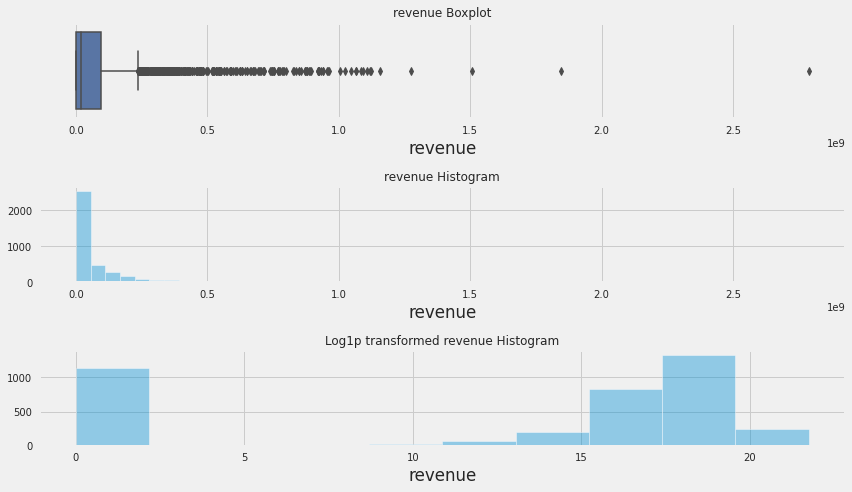

In [21]:
# plots for Revenue


f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")
sns.distplot(a=df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")
sns.distplot(a=np.log1p(df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

df["log_revenue"] = np.log1p(df.revenue)

Only few outliers(dots) made an exceedingly high revenue. As can be seen in the histogram above.

Title

Preprocessing Title

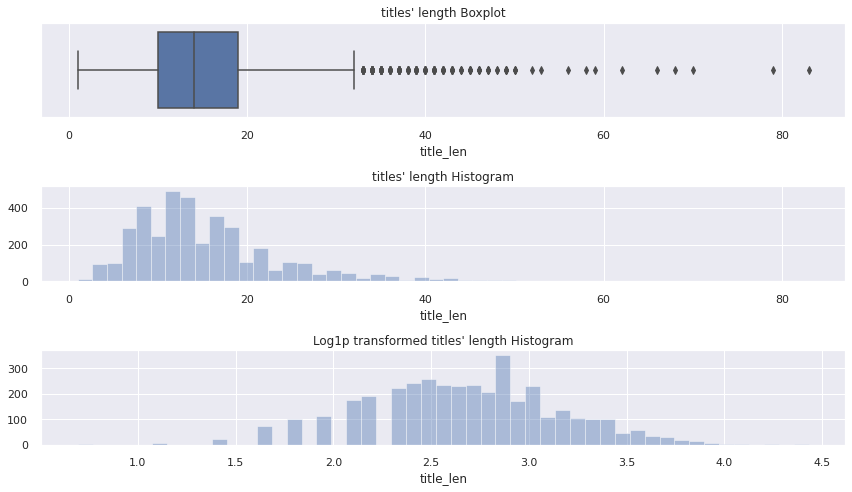

In [22]:
df["title"] = df["title"].fillna("")
df["title_len"] = df["title"].apply(len)



f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.title_len, ax = ax[0])
ax[0].set_title("titles' length Boxplot")
sns.distplot(a=df.title_len, kde = False, ax = ax[1])
ax[1].set_title("titles' length Histogram")
sns.distplot(a=np.log1p(df.title_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed titles' length Histogram")
f.tight_layout()
df["log_title_len"] = np.log1p(df.title_len)

A small number of outliers have over words/characters 30 in thier title and with most movies having less than 30

Overview

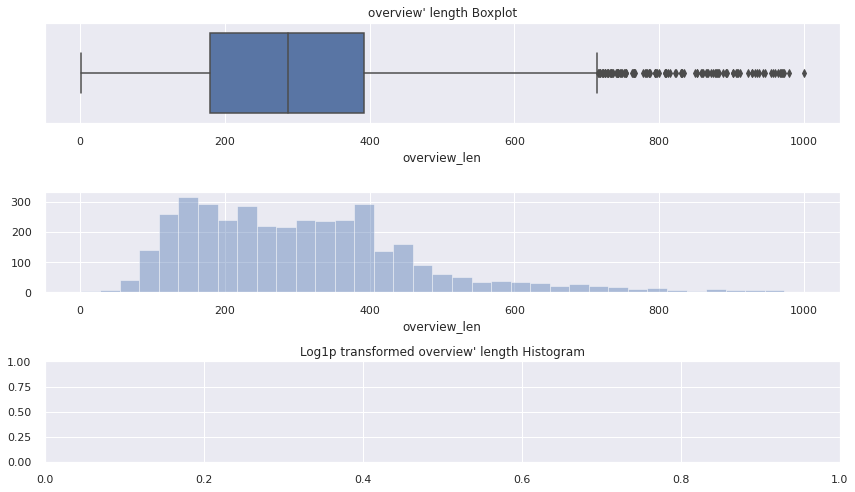

In [23]:
# describe the length of word length in overview
df["overview"] = df["overview"].fillna("")
df["overview_len"] = df["overview"].apply(len)



f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.overview_len, ax = ax[0])
ax[0].set_title("overview' length Boxplot")
sns.distplot(a=df.overview_len, kde = False, ax = ax[1])

ax[2].set_title("Log1p transformed overview' length Histogram")
f.tight_layout()
df["log_overview_len"] = np.log1p(df.overview_len)


Overview means description of the movie. According to the histogram, a majority of the movies have between 50 - 450 words in their overviews. while a small amount have less than 50 words or greater than 450 words. outliers will contain 700 - 10,000 words.

Tagline

Preprocessing Tagline

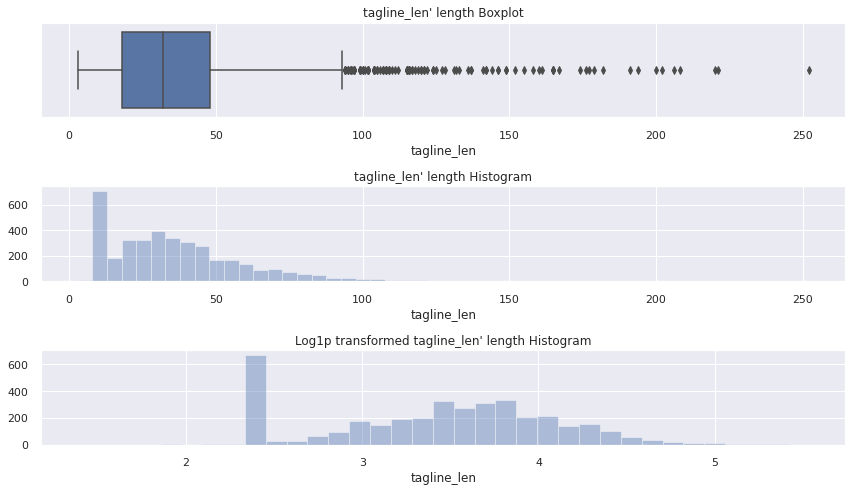

In [24]:
df["tagline"] = df["tagline"].fillna("")
df["tagline_len"] = df["tagline"].apply(len)



f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.tagline_len, ax = ax[0])
ax[0].set_title("tagline_len' length Boxplot")
sns.distplot(a=df.tagline_len, kde = False, ax = ax[1])
ax[1].set_title("tagline_len' length Histogram")
sns.distplot(a=np.log1p(df.tagline_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed tagline_len' length Histogram")
f.tight_layout()
df["log_tagline_len"] = np.log1p(df.tagline_len)

Most of the movies have 50 words or less in their taglines, while outliers (diamond shaped dots) in boxplot will have over 100 words in their tagline.

Budget

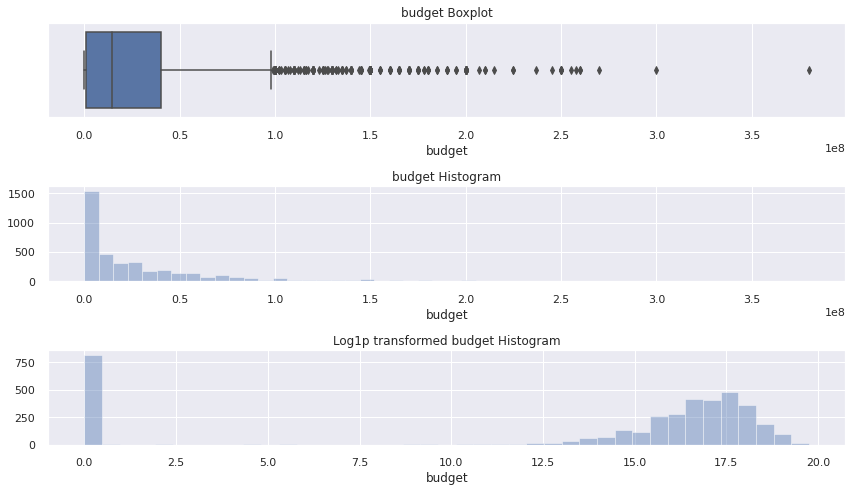

In [25]:
f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")
sns.distplot(a=df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")
sns.distplot(a=np.log1p(df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

df["log_budget"] = np.log1p(df.budget)

N/A type datapoints were replaced with "0". A few outlier datapoints have high budgets for their movies in the amount of 150 million or more. Most movies(datapoints) having around 15 million or less.

Genre

Preprocessing Genre 

Text(0.5, 1.0, 'Number of films per genre')

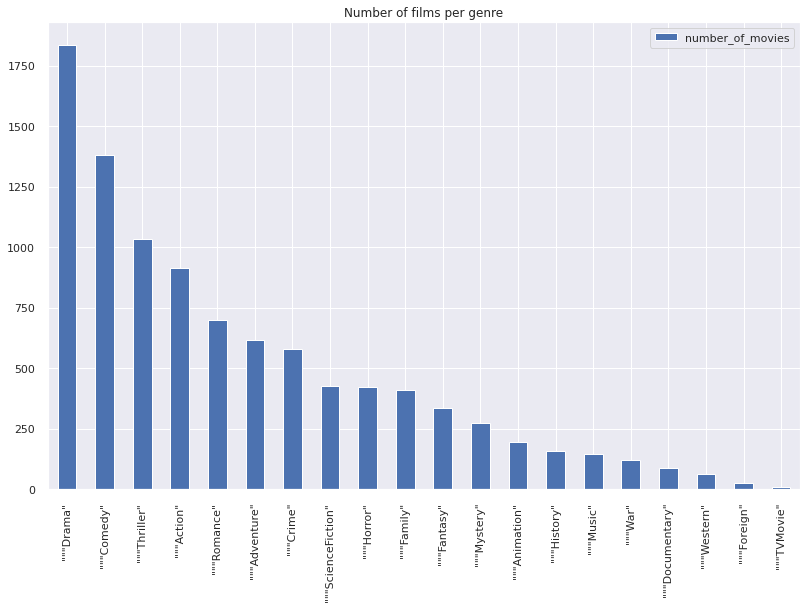

In [26]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

df["genres_processed"] = df.genres.apply(lambda elem: genres_preprocessing(elem))

genres_dict = dict()

for genre in df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()
plt.title("Number of films per genre")

TV movies, westerns, war, documentary, music, etc. represent outliers within dataset. There are more of some categories than others (Skewed/unequal distribtion per category).

Text(0.5, 1.0, 'Number of films with more than 1 genre')

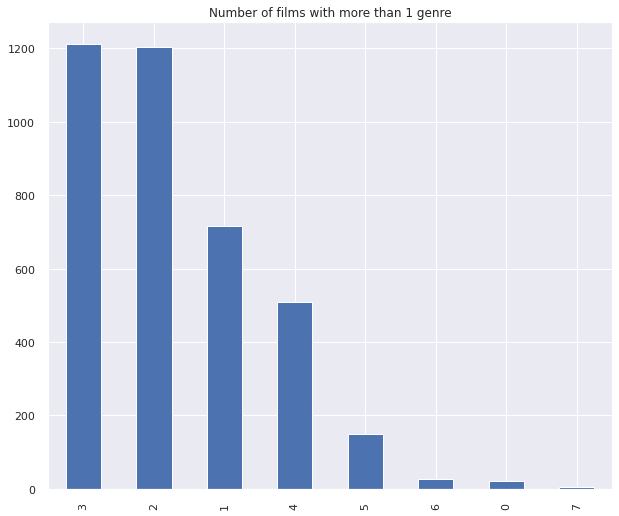

In [27]:
# code to display the number of genres

sns.set(rc={'figure.figsize':(9,8)})
df['num_genres'] = df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)
df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

Bulk of the data points have four or less categories while the outliers will have 5 or more categories. There are around 100 outliers.

In [28]:
genres_df.index.values
for g in genres_df.index.values:
    df['isGenre_' + g] = df['genres_processed'].apply(lambda x: 1 if g in x else 0)

df.columns

Index(['title', 'tagline', 'revenue', 'budget', 'genres', 'homepage', 'id',
       'keywords', 'original_language', 'overview', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'tagline_len', 'log_tagline_len', 'log_budget',
       'genres_processed', 'num_genres', 'isGenre_"""Drama"',
       'isGenre_"""Comedy"', 'isGenre_"""Thriller"', 'isGenre_"""Action"',
       'isGenre_"""Romance"', 'isGenre_"""Adventure"', 'isGenre_"""Crime"',
       'isGenre_"""ScienceFiction"', 'isGenre_"""Horror"',
       'isGenre_"""Family"', 'isGenre_"""Fantasy"', 'isGenre_"""Mystery"',
       'isGenre_"""Animation"', 'isGenre_"""History"', 'isGenre_"""Music"',
       'isGenre_"""War"', 'isGenre_"""Documentary"', 'isGenre_"""Western"',
       'isGenre_"""Foreign"', 'isGenre_"""TVMovie"'],
      dtype='object')

Original Lanaguage

Text(0.5, 1.0, 'Number of films per language')

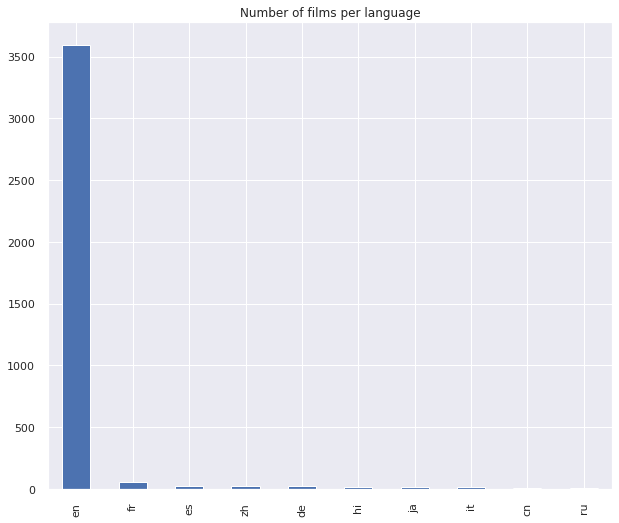

In [29]:
df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

most films original language is english. All others languages listed in the dataset are outliers, such as french, spanish, russian, etc. The outliers represent maybe around may 300 or less data points.

Production Companies

preprocessing columns before plot

Text(0.5, 1.0, 'Number of films per production company')

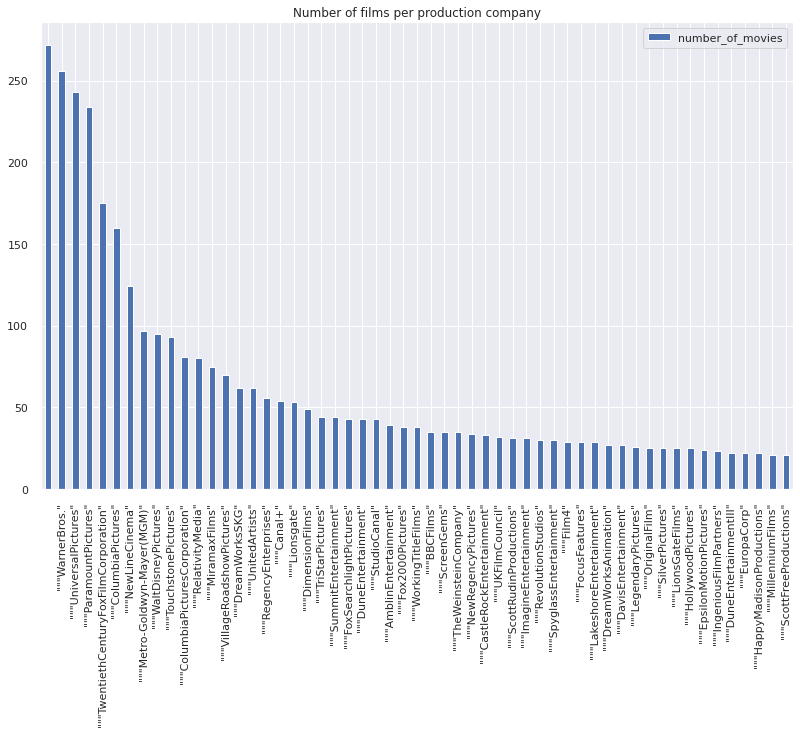

In [30]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

df["production_companies"] = df.production_companies.fillna('NoProductionCompany')
df["production_companies_processed"] = df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))



production_companies_dict = dict()

for production_company in df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(55).plot.bar()
plt.title("Number of films per production company")

Text(0.5, 1.0, 'Number of films per production company')

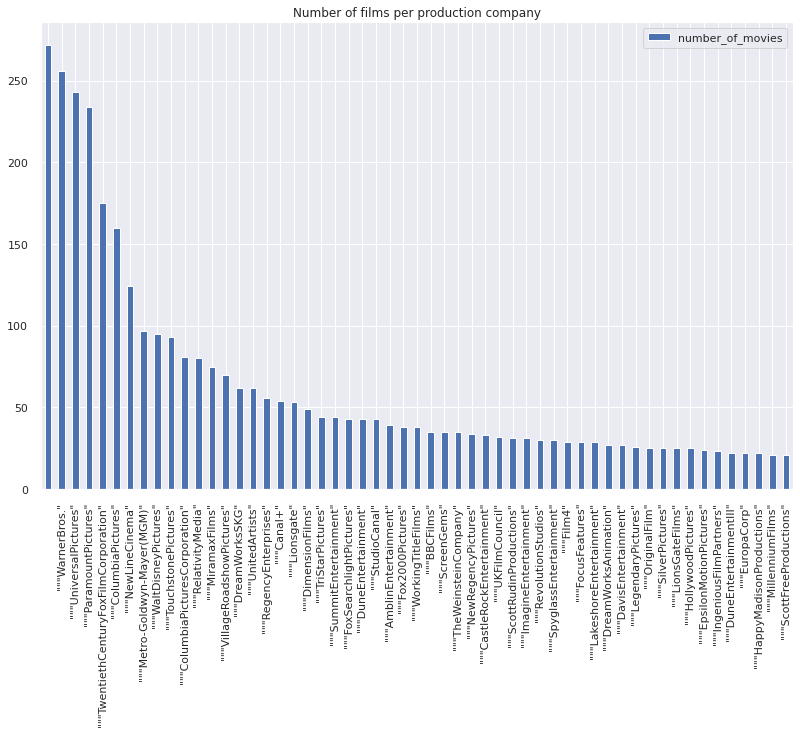

In [31]:
sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(55).plot.bar()
plt.title("Number of films per production company")

There is not equal representation of movie-productions per company. It is skewed in this way. for example, only maybe 19 films of studiobabelburg is represented in this dataset while warner brothers have 200.



Text(0.5, 1.0, 'Number of multiple production companies per movie')

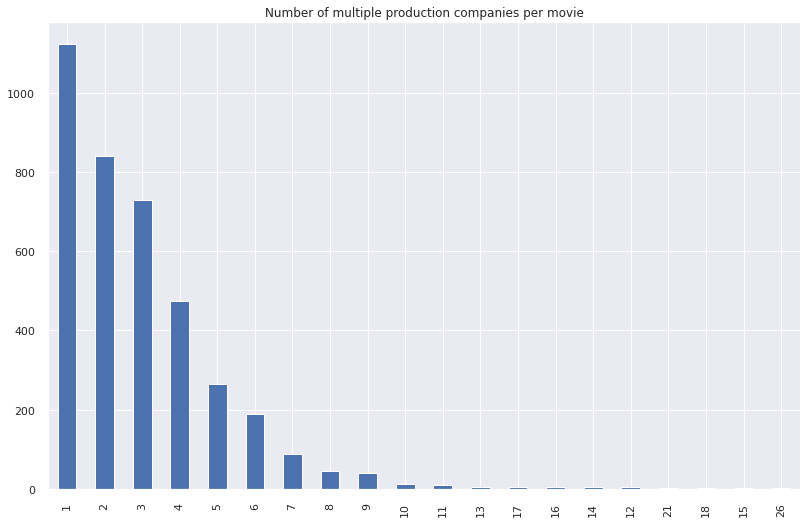

In [32]:
# count number of production companies for each movie

df["num_of_production_companies"] = df.production_companies_processed.apply(len)
df["num_of_production_companies"].value_counts().plot.bar()
plt.title("Number of multiple production companies per movie")

Bar graph shows number of production companies per single movie. 900 movies have one production company. 700 movies have 2 production companies. around 320 movies had three production companies. Outliers will have 5 or more production companies.

Runtime


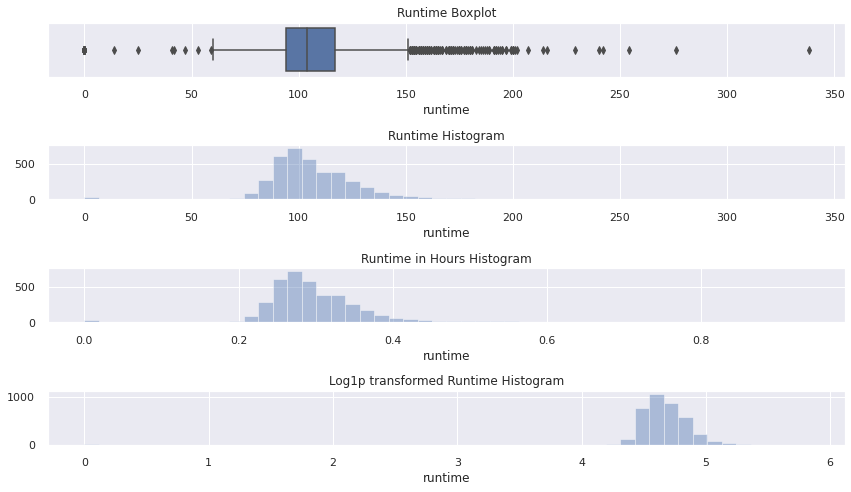

In [33]:
f, ax = plt.subplots(4, figsize=(12,7))
df.runtime = df.runtime.fillna(df.runtime.mode())
sns.boxplot(x=df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")
sns.distplot(a=df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")
sns.distplot(a=df.runtime/360, kde = False, ax = ax[2])
ax[2].set_title("Runtime in Hours Histogram")
sns.distplot(a=np.log1p(df.runtime), kde = False, ax = ax[3])
ax[3].set_title("Log1p transformed Runtime Histogram")
f.tight_layout()
df["runtime_in_hours"] = df.runtime/360
df["log_runtime"] = np.log1p(df.runtime)

most movies based upon the boxplot run in length of 70 - 150 minutes. With few outliers over 150 minutes or below 70 minutes.

Status

Text(0.5, 1.0, 'Number of films that have been released')

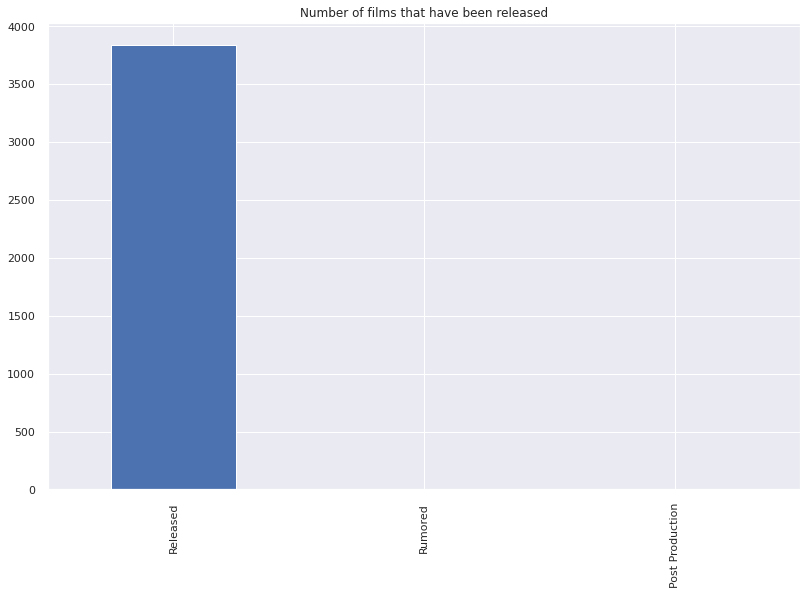

In [34]:
df['status'].value_counts().plot.bar()
plt.title("Number of films that have been released")

All movies were released and none were rumored or never released.z

Production Countries

Preprocess Production Countries

Text(0.5, 1.0, 'Number of films per production country')

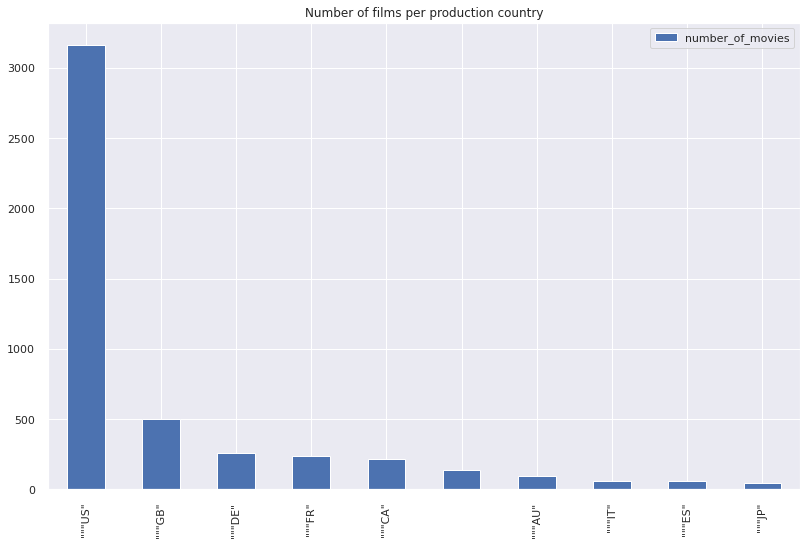

In [35]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

df["production_countries_processed"] = df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))

production_countries_dict = dict()

for production_country in df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1

production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(10).plot.bar()
plt.title("Number of films per production country")

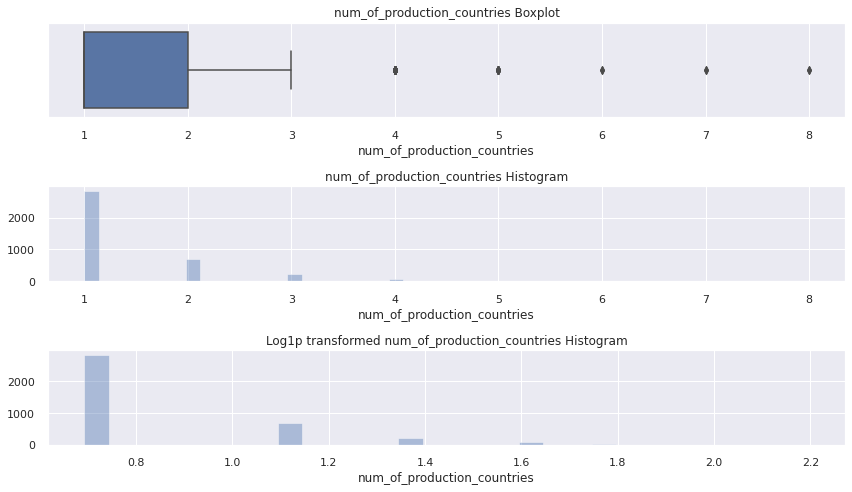

In [36]:
df["num_of_production_countries"] = df.production_countries_processed.apply(len)


f, ax = plt.subplots(3, figsize=(12,7))

df.num_of_production_countries = df.num_of_production_countries.fillna(0)

sns.boxplot(x=df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")
sns.distplot(a=df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")
sns.distplot(a=np.log1p(df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")
f.tight_layout()

df["log_num_of_production_countries"] = np.log1p(df.num_of_production_countries)

Most of movies in the dataset were filmed 3 or less countries. While only 5 films (the outliers) were filmed in more than 3 countries.

**Multivariate Analysis**

homepage and revenue

1    3842
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

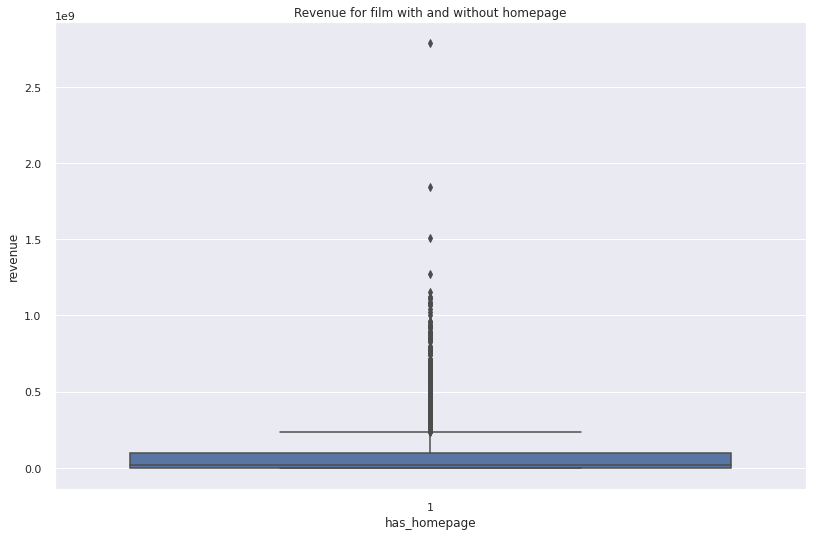

In [37]:
df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in df['homepage']]
print(df['has_homepage'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=df)
plt.title('Revenue for film with and without homepage')

1    3842
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

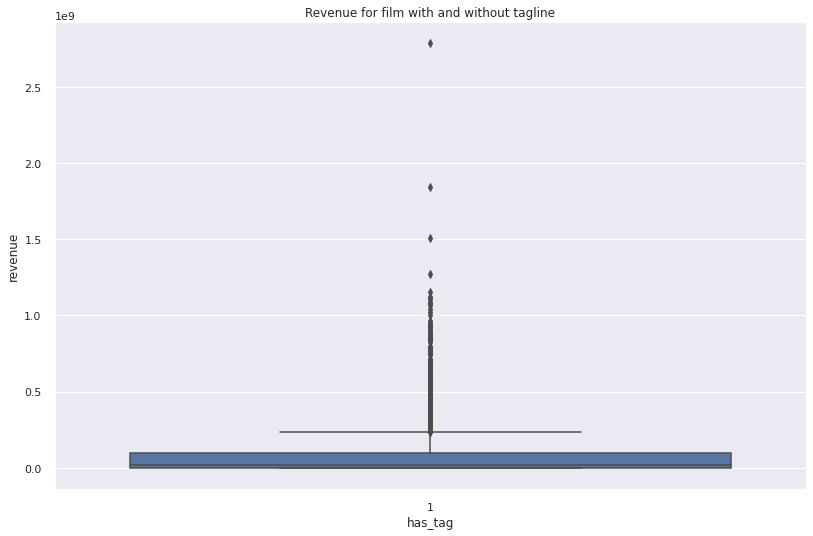

In [38]:
df['has_tag'] = [0 if len(x) == 0 else 1 for x in df['tagline']]

print(df['has_tag'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=df)
plt.title('Revenue for film with and without tagline')

films with mutliple genre and revenue

Text(0.5, 1.0, 'Revenues for films with multiple genres')

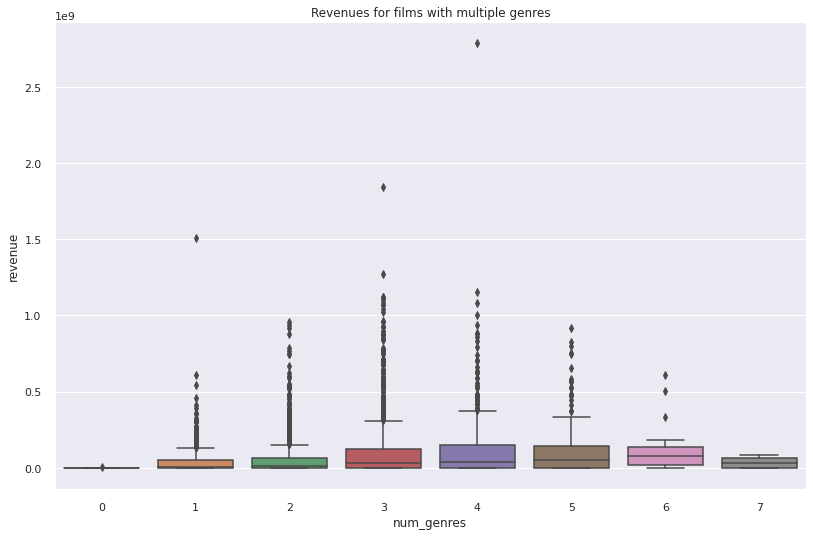

In [39]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_genres', y='revenue', data=df)
plt.title('Revenues for films with multiple genres')

The more genres a film has the more revenue it seems to generate.

genre and revenue

In [40]:
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_salary"] = df[df['isGenre_' + g]==1].revenue.median()

genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

number_of_movies  median_salary
"""Drama"                       1836      9497704.0
"""Comedy"                      1381     17460020.0
"""Thriller"                    1033     29400000.0
"""Action"                       913     51680201.0
"""Romance"                      699     13269963.0
"""Adventure"                    616     96584906.0
"""Crime"                        578     22691772.0
"""ScienceFiction"               425     53187659.0
"""Horror"                       420     17293767.5
"""Family"                       411     72417394.0

Text(0.5, 1.0, 'Sorted movie genres by median revenue')

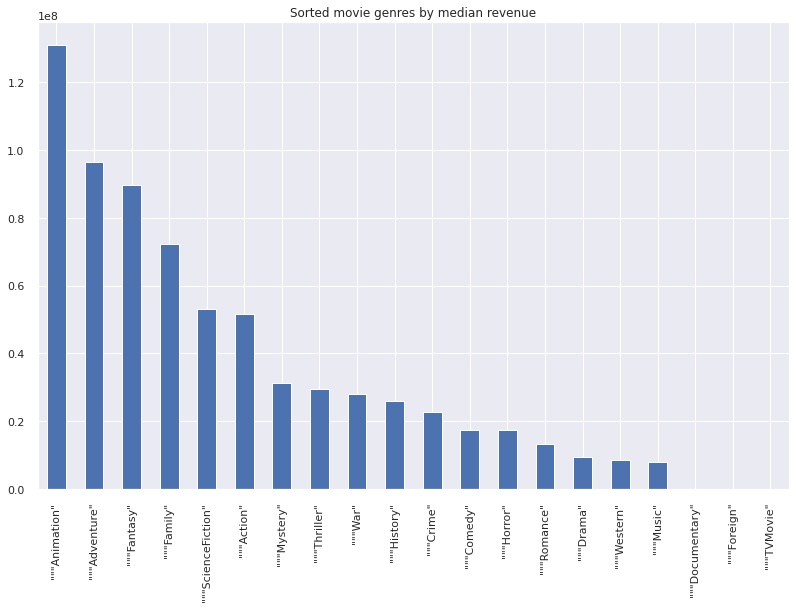

In [41]:
genres_df.sort_values(by=["median_salary"], ascending=False).median_salary.plot.bar()
plt.title("Sorted movie genres by median revenue")

The only genres that did not make revenue are documentaries and foriegn films and TV movies.

Each individual genre and revenue

preprocessing

In [42]:
for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    df['isTopGenre_' + p] = df['genres_processed'].apply(lambda x: 1 if p in x else 0)
    df['isTopGenre_Other'] = df['genres_processed'].apply(lambda x: 1 if p not in x else 0)

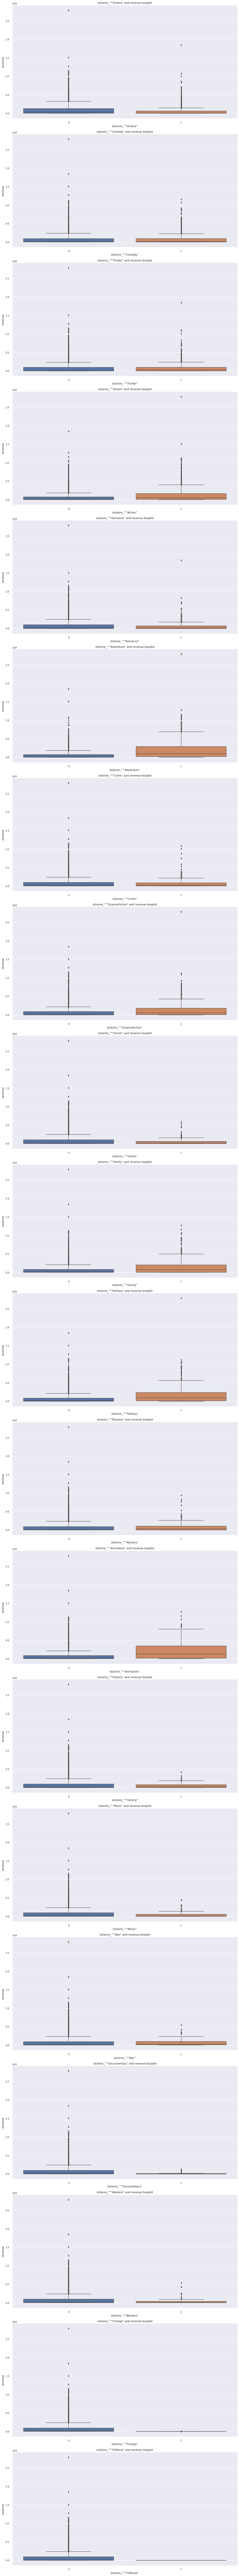

In [43]:
f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

for i, g in enumerate(genres_df.index.values):
    sns.boxplot(x=df['isGenre_' + g], y='revenue', ax=ax[i], data=df)
    ax[i].set_title('isGenre_' + g +" and revenue boxplot")
f.tight_layout()

Productions Companies and Revenue

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

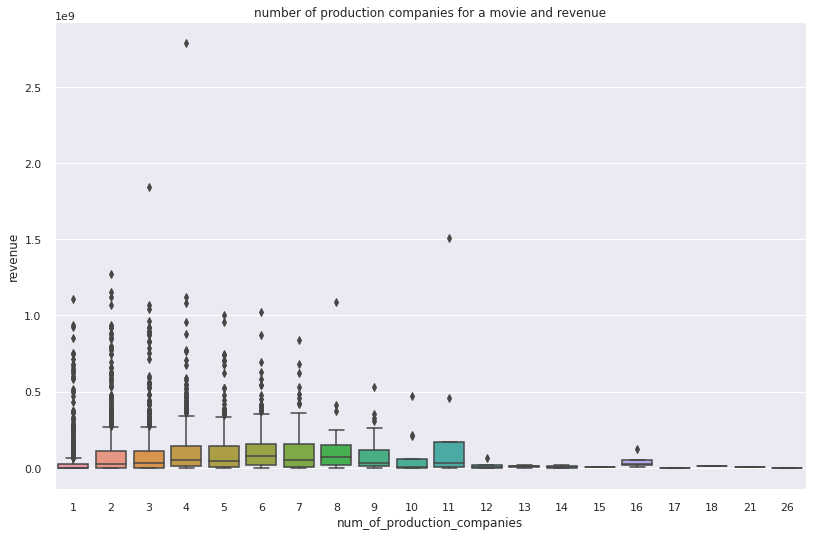

In [44]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=df)
plt.title('number of production companies for a movie and revenue')

films with 3-11 production companies made high revnue while films with only 1 or greater 12 than made less revenue generally. Most outliers had between 1-9 movies per film.

Original Language and Revenue

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

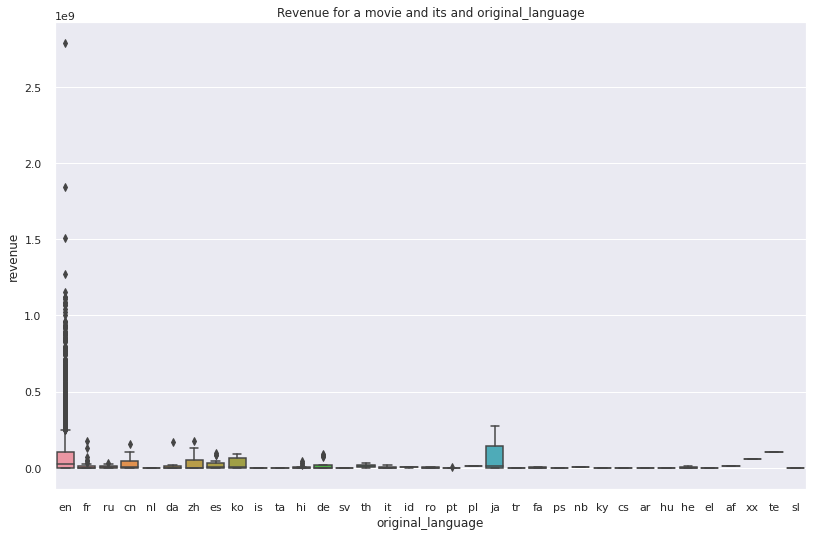

In [45]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=df)
plt.title('Revenue for a movie and its and original_language')


Most of the outliers ( above centered dots) have english as thier original lankguage. "en", "zh", "tr", "ja", and "cn" are the only languages which made a recognizable revenue.

Production Country and Revenue

Text(0.5, 1.0, 'number of production countries for a movie and revenue')

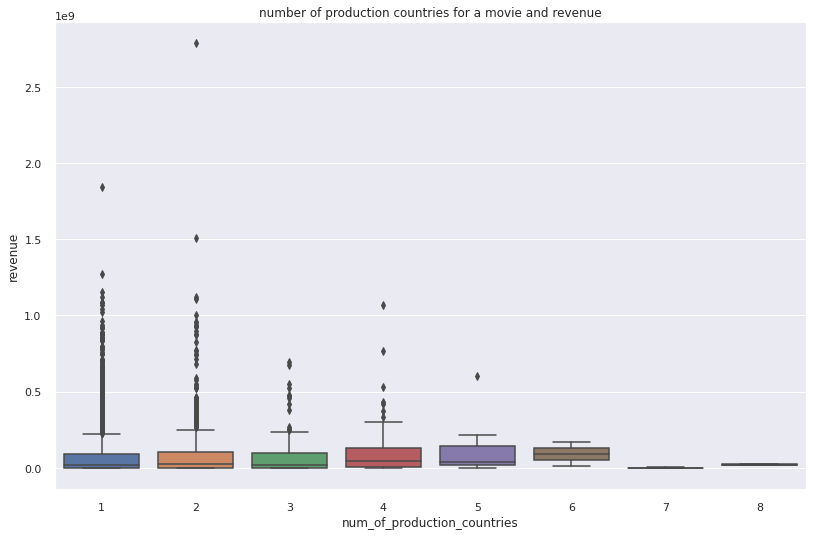

In [46]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_countries', y='revenue', data=df)
plt.title('number of production countries for a movie and revenue')

Films were six or less countries used for filming had higher revenue than films with more than 6.

Further Preprocessing and Feature Engineering

Preprocessing release_date column

In [47]:

# use strptime function to separate/access day,month, and year values from column
df['temp'] = df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

# create different columns from temp column holding release_date values
df["month"] = df.temp.apply(lambda x: x.month)
df["season"] = df["month"]%4
df["year"] = df.temp.apply(lambda x: x.year)
df["day_of_week"] = df.temp.apply(lambda x: x.weekday()+1)
df["week_of_year"] = df.temp.apply(lambda x: x.isocalendar()[1])


#drop temp column from dataframe
df = df.drop(['temp'], axis=1)

#print newly made columns
df[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head()

release_date  month  year  day_of_week  week_of_year  season
0     08/10/91      8  1991            6            32       0
1     10/10/08     10  2008            5            41       2
2     12/17/10     12  2010            5            50       0
3     08/31/07      8  2007            5            35       0
4     12/14/02     12  2002            6            50       0

Preprocessing and Feature Engineering Test Dataset

In [48]:
#load test data
test_df = pd.read_csv('/content/Evaluation_data.csv')

In [49]:
test_df.head(1)

title  ...    status
0  Avengers: Age of Ultron  ...  Released

[1 rows x 16 columns]

In [50]:
def clean_test_dataset():

  #remove all null values from columns
  #did not fill in null values for for "tagline" and "posterpath" and "homepage" as values
  #needed for a plot.
  test_df["genres"].fillna("no genres", inplace = True)
  test_df["overview"].fillna("no overview", inplace = True)
  test_df["production_companies"].fillna("no production_companies", inplace = True)
  test_df["production_countries"].fillna("no production_countries", inplace = True)
  test_df["runtime"].fillna(0, inplace = True)
  test_df["spoken_languages"].fillna("no languages", inplace = True)
  test_df["keywords"].fillna("no keywords", inplace = True)
  test_df["tagline"].fillna("no tagline", inplace = True)
  test_df["homepage"].fillna("no homepage", inplace = True)
  test_df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: datetime.strftime(x, '%m/%d/%y'))
  #changes date format to month/day/year
#call clean_dataset function
clean_test_dataset()

In [51]:
# title column
test_df["title"] = test_df["title"].fillna("")
test_df["title_len"] = test_df["title"].apply(len)

test_df["log_title_len"] = np.log1p(test_df.title_len)

In [52]:
#overview column
test_df["overview"] = test_df["overview"].fillna("")
test_df["overview_len"] = test_df["overview"].apply(len)

test_df["log_overview_len"] = np.log1p(test_df.overview_len)

In [53]:
#tagline
test_df["tagline"] = test_df["tagline"].fillna("")
test_df["tagline_len"] = test_df["tagline"].apply(len)
test_df["log_tagline_len"] = np.log1p(test_df.tagline_len)

In [54]:
#budget
test_df["log_budget"] = np.log1p(test_df.budget)

Text(0.5, 1.0, 'Number of films per genre')

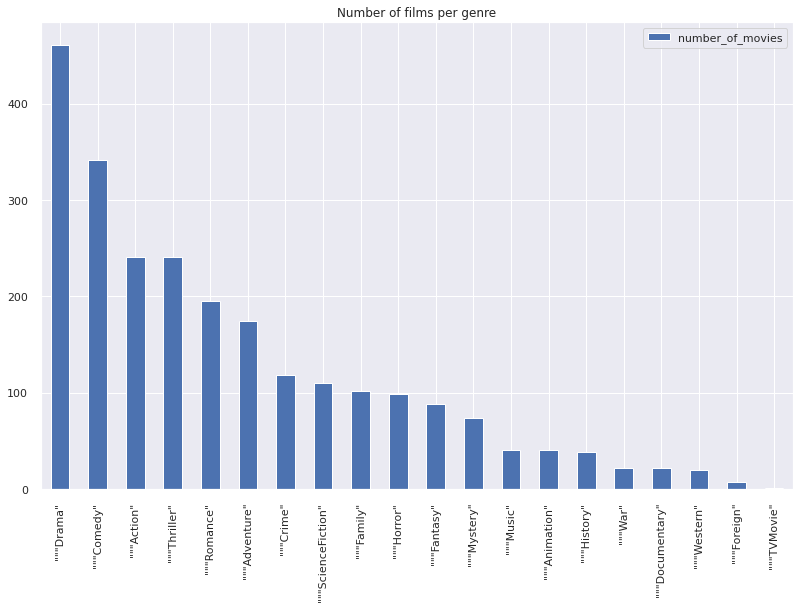

In [55]:
#genres
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

genres_dict = dict()

for genre in test_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()
plt.title("Number of films per genre")

In [56]:
# get number of genres in test dataset
test_df['num_genres'] = test_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)

In [57]:
genres_df.index.values
for g in genres_df.index.values:
    test_df['isGenre_' + g] = test_df['genres_processed'].apply(lambda x: 1 if g in x else 0)

In [58]:
# is english
test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)
test_df.is_english_language = test_df.is_english_language.fillna(1)

Text(0.5, 1.0, 'Number of films per production company')

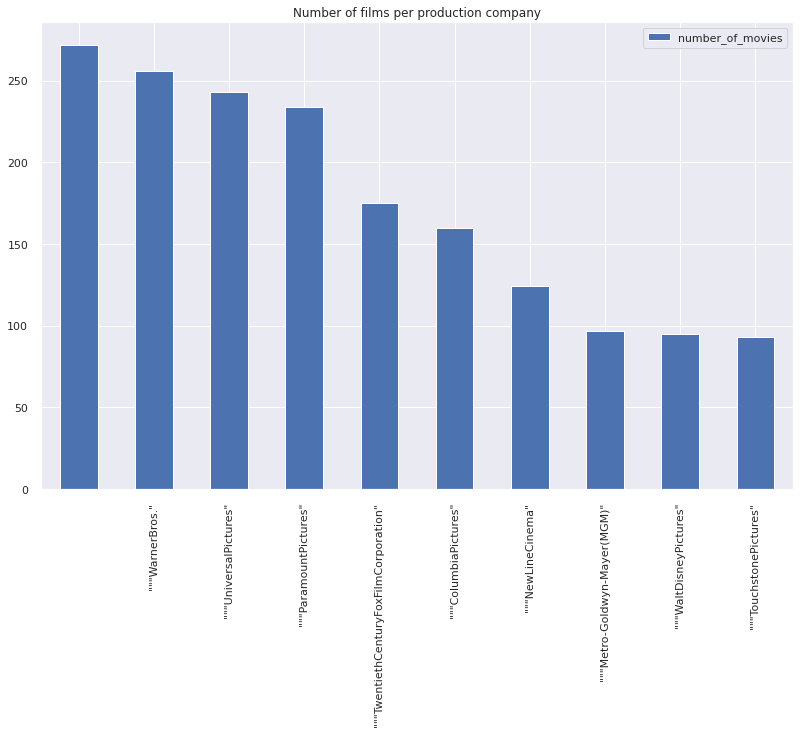

In [59]:
# production companies

def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))

production_companies_dict = dict()

for production_company in df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(10).plot.bar()
plt.title("Number of films per production company")

In [60]:
#number of production companies
test_df["num_of_production_companies"] = test_df.production_companies_processed.apply(len)

In [61]:
#feature engineering: isProduction company
for g in production_companies_df.index.values:
    test_df['isProductionCompany_' + g] = test_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)

Text(0.5, 1.0, 'Number of films per production country')

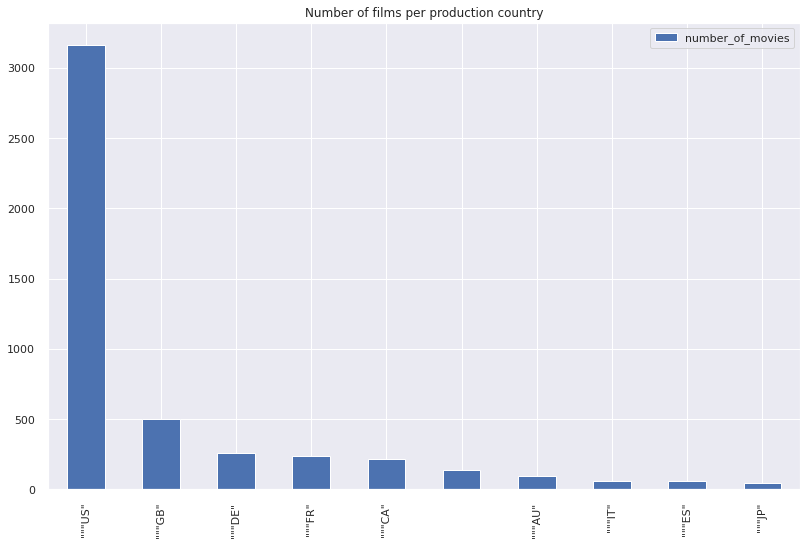

In [62]:
# production countries
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))

production_countries_dict = dict()

for production_country in df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1



production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(10).plot.bar()
plt.title("Number of films per production country")

In [63]:
# isProduction company feature engineering 
for c in production_countries_df.index.values:
    test_df['isProductionCountry_' + c] = test_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)

In [64]:
#runtime

test_df["runtime"] = test_df["runtime"].fillna(test_df["runtime"].mode()[0])
test_df["runtime_in_hours"] = test_df.runtime/360
test_df["log_runtime"] = np.log1p(test_df.runtime)

In [65]:
#preprocess 

# fill possible NA values with the statistical mode
test_df["release_date"] = test_df["release_date"].fillna(test_df["release_date"].mode()[0])


test_df['temp'] = test_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

test_df["month"] = test_df.temp.apply(lambda x: x.month)
test_df["season"] = test_df["month"]%4
test_df["year"] = test_df.temp.apply(lambda x: x.year)
test_df["day_of_week"] = test_df.temp.apply(lambda x: x.weekday()+1)
test_df["week_of_year"] = test_df.temp.apply(lambda x: x.isocalendar()[1])

test_df = test_df.drop(['temp'], axis=1)



test_df["day_of_week"] = test_df["day_of_week"].fillna(test_df["day_of_week"].mode()[0])

test_df["year"] = test_df["year"].fillna(test_df["year"].mode()[0])

test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0])

test_df["week_of_year"] = test_df["week_of_year"].fillna(test_df["week_of_year"].mode()[0])

test_df["season"] = test_df["season"].fillna(test_df["season"].mode()[0])

In [66]:
# number of production countries
test_df["num_of_production_countries"] = test_df.production_countries_processed.apply(len)
test_df.num_of_production_countries = test_df.num_of_production_countries.fillna(0)
test_df["log_num_of_production_countries"] = np.log1p(test_df.num_of_production_countries)

In [67]:
# number of genres
test_df["num_of_genres"] = test_df.genres_processed.apply(len)
test_df.num_of_genres = test_df.num_of_genres.fillna(0)
test_df["log_num_of_genres"] = np.log1p(test_df.num_of_genres)

In [68]:
# has homepage
test_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test_df['homepage']]

In [69]:
# has tag
test_df['has_tag'] = [0 if len(x) == 0 else 1 for x in test_df['tagline']]

In [70]:
# creating is genre
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_salary"] = df[df['isGenre_' + g]==1].revenue.median()

In [71]:
# is top genre
for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    test_df['isTopGenre_' + p] = test_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
    test_df['isTopGenre_Other'] = test_df['genres_processed'].apply(lambda x: 1 if p not in x else 0)

Preparations for ML Training

In [72]:
test_df.head(1)

title  ... isTopGenre_"""Horror"
0  Avengers: Age of Ultron  ...                     0

[1 rows x 4496 columns]

In [73]:
df.head(1)

title  ... week_of_year
0  Double Impact  ...           32

[1 rows x 71 columns]

Log Transformations for Select columns used in Training Model

In [74]:
#apply log transformations to num_genres column
df["log_num_genres"] = np.log1p(df.num_genres)
test_df["log_num_genres"] = np.log1p(test_df.num_genres)

#apply log transformations to num of production companies column
df["log_num_of_production_companies"] = np.log1p(df.num_of_production_companies)
test_df["log_num_of_production_companies"] = np.log1p(test_df.num_of_production_companies)

#apply log transformations to has tag column
df["log_has_tag"] = np.log1p(df.has_tag)
test_df["log_has_tag"] = np.log1p(test_df.has_tag)

#apply log transformations to has homepage column
df["log_has_homepage"] = np.log1p(df.has_homepage)
test_df["log_has_homepage"] = np.log1p(test_df.has_homepage)

#apply log transformations to month column
df["log_month"] = np.log1p(df.month)
test_df["log_month"] = np.log1p(test_df.month)

#apply log transformations to season column
df["log_season"] = np.log1p(df.season)
test_df["log_season"] = np.log1p(test_df.season)

#apply log transformations to year column
df["log_year"] = np.log1p(df.year)
test_df["log_year"] = np.log1p(test_df.year)

#apply log transformations to day of week column
df["log_day_of_week"] = np.log1p(df.day_of_week)
test_df["log_day_of_week"] = np.log1p(test_df.day_of_week)

#apply log transformations to week of year column
df["log_week_of_year"] = np.log1p(df.week_of_year)
test_df["log_week_of_year"] = np.log1p(test_df.week_of_year)

choosing which features to use for training model

In [75]:
#choosing which features to use for training model
columns_for_training = [
"log_title_len",
"log_overview_len",
"log_tagline_len",
"log_budget",
"log_num_genres",
"log_num_of_production_companies",
"log_runtime",
"log_has_homepage",
"log_has_tag",
"log_month",
"log_season",
"log_year",
"log_day_of_week",
"log_week_of_year",
'isGenre_"""Drama"',
'isGenre_"""Comedy"', 
'isGenre_"""Thriller"', 
'isGenre_"""Action"',
'isGenre_"""Romance"', 
'isGenre_"""Adventure"', 
'isGenre_"""Crime"',
'isGenre_"""ScienceFiction"', 
'isGenre_"""Horror"',
'isGenre_"""Family"', 
'isGenre_"""Fantasy"', 
'isGenre_"""Mystery"',
'isGenre_"""Animation"', 
'isGenre_"""History"', 
'isGenre_"""Music"',
'isGenre_"""War"', 
'isGenre_"""Documentary"', 
'isGenre_"""Western"',
'isGenre_"""Foreign"', 
'isGenre_"""TVMovie"',
'isTopGenre_"""Romance"',
'isTopGenre_"""Crime"',
'isTopGenre_"""Adventure"',
'isTopGenre_"""Horror"',
'isTopGenre_"""ScienceFiction"',
'isTopGenre_"""Family"',
'isTopGenre_"""Comedy"'
]

In [96]:
y = df['log_revenue']
X = df[columns_for_training]
kfold_splits = 5

Training Basic XGBoost Model


Fold: 0

[02:40:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:14.3746	validation_1-rmse:13.7302
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 2500 rounds.
[50]	validation_0-rmse:4.67358	validation_1-rmse:6.0598
[100]	validation_0-rmse:4.18275	validation_1-rmse:5.9459
[150]	validation_0-rmse:3.96057	validation_1-rmse:5.99235
[200]	validation_0-rmse:3.78257	validation_1-rmse:5.90782
[250]	validation_0-rmse:3.71216	validation_1-rmse:5.80379
[300]	validation_0-rmse:3.68224	validation_1-rmse:5.78434
[350]	validation_0-rmse:3.66447	validation_1-rmse:5.80336
[400]	validation_0-rmse:3.59565	validation_1-rmse:5.81376
[450]	validation_0-rmse:3.55886	validation_1-rmse:5.80947
[500]	validation_0-rmse:3.56074	validation_1-rmse:5.84375
[550]	validation_0-rmse:3.54022	validation_1-rmse:5.84394
[600]	valid

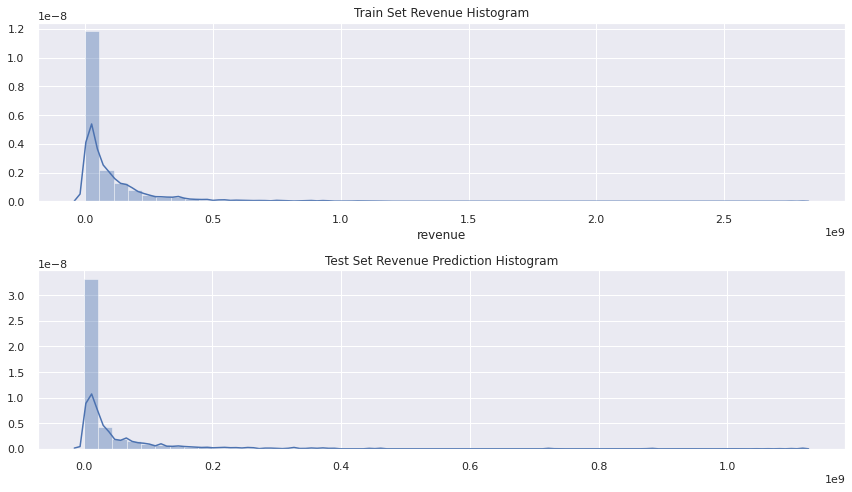

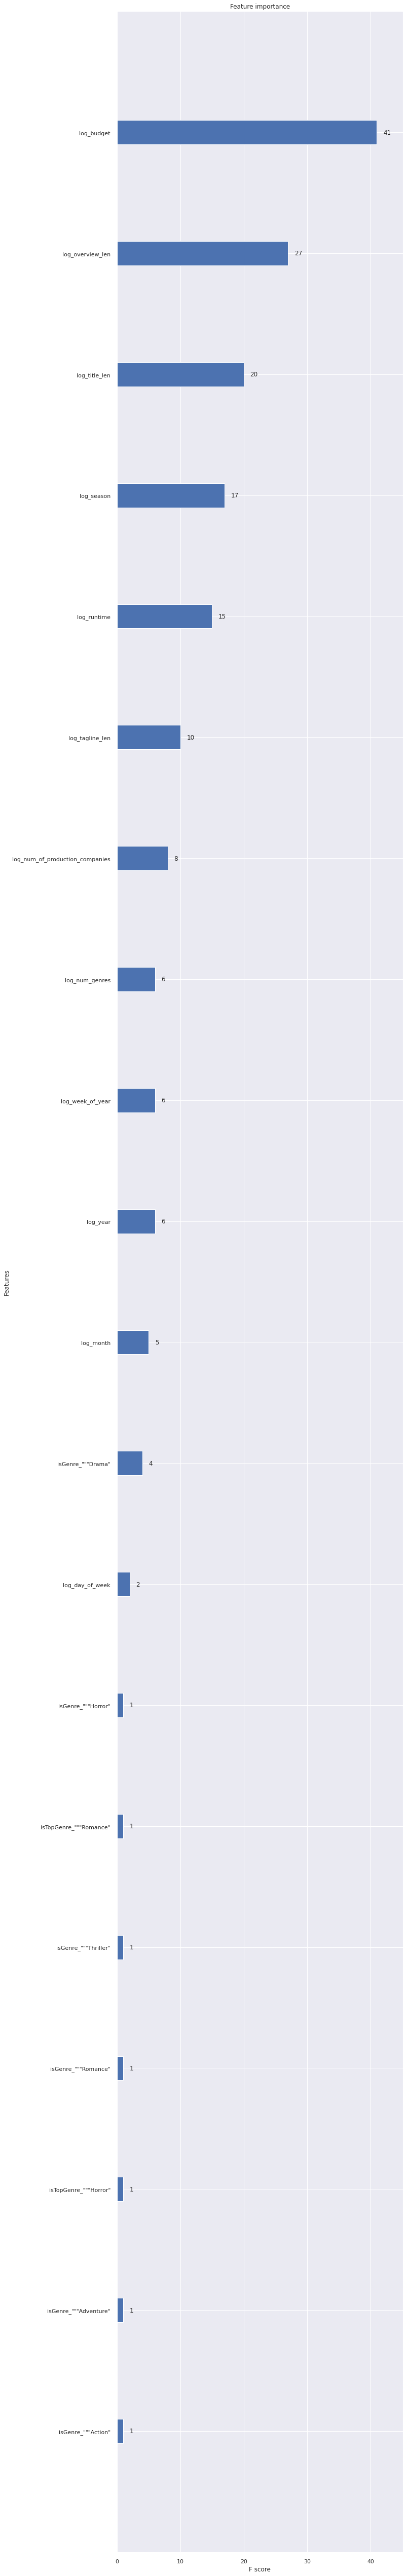

In [123]:
# split the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, shuffle=False, test_size=10,  train_size=100)


predictions_test_xgb = np.zeros(len(test_df))

num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0
                                          #True
folds = KFold(n_splits=num_of_splits, shuffle=False, random_state =42) #42

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
                                              #10000     #42      #-1
    clf_stra_xgb = xgb.XGBRegressor(n_estimators=5000, 
                                    seed=42, 
                                    nthread=-1, 
                                    learning_rate=0.1,
                                    silent=None, 
                                    objective='reg:linear', 
                                    booster='gbtree', 
                                    n_jobs=5, 
                                    gamma=50, 
                                    min_child_weight=7, 
                                    max_delta_step=5, #0
                                    subsample=0.5, 
                                    colsample_bytree=1, 
                                    colsample_bylevel=0.5, 
                                    colsample_bynode=0.5, 
                                    reg_alpha=0, 
                                    reg_lambda=9, 
                                    scale_pos_weight=9, 
                                    base_score=0.9, #0.5
                                    random_state=42)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=2500, eval_metric='rmse', verbose=50)
                          #5000                                 #100
    predictions_valid = clf_stra_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    
    print("Fold",num_fold,"xvalid rmse:",rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_xgb += clf_stra_xgb.predict(test_df[xtrain.columns])/num_of_splits

predictions_test_xgb = np.expm1(predictions_test_xgb)
print()
print(predictions_test_xgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_xgb)

Features with isGenre and TopisGenre in their titles had lower feature scores(F score) than other assigned features in the columns_for_training variable. All the most important features had log transformations applied to them. There are some features missing in this dataset like popularity, etc. which the original dataset had from Kaggle. It might be that without those features my OOF RSME score are 3 points higher than compared to the 1.9 - 2.0 RSME score I had when I used the original Kaggle Dataset.

Extra Trees Baseline Model


Fold: 0

Fold 0 xvalid rmse: 2.568579602941868

Fold: 1

Fold 1 xvalid rmse: 1.518165324338327

Fold: 2

Fold 2 xvalid rmse: 3.2550083450488274

Fold: 3

Fold 3 xvalid rmse: 2.8451741767090435

Fold: 4

Fold 4 xvalid rmse: 4.277484357731879

[1.20000165e+08 2.43353901e+08 1.31817613e+08 9.54003164e+07
 1.93385906e+08 1.67070504e+08 1.35744776e+08 3.32642260e+07
 7.19041500e+07 5.59111452e+07 8.06702853e+07 9.81391568e+07
 6.49926529e+07 1.33352903e+08 7.02574007e+07 7.03433525e+07
 6.74993632e+07 1.03806074e+08 3.56115586e+07 1.44655168e+08
 1.88910569e+08 1.46273966e+08 2.42911342e+08 1.69238137e+08
 1.43274980e+08 4.08059454e+07 2.88567515e+08 8.05177810e+07
 1.55865346e+08 7.84868206e+07 4.49525044e+07 5.78704514e+07
 1.13983556e+08 1.15431515e+08 1.17583666e+08 3.57886866e+07
 5.26082929e+07 7.07371914e+07 8.92761507e+06 1.00392967e+08
 4.55901913e+07 1.94397569e+07 1.14709220e+08 2.73123525e+07
 1.05552681e+08 1.59193725e+08 5.50730433e+07 4.02097251e+07
 8.72205528e+07 1.1700572

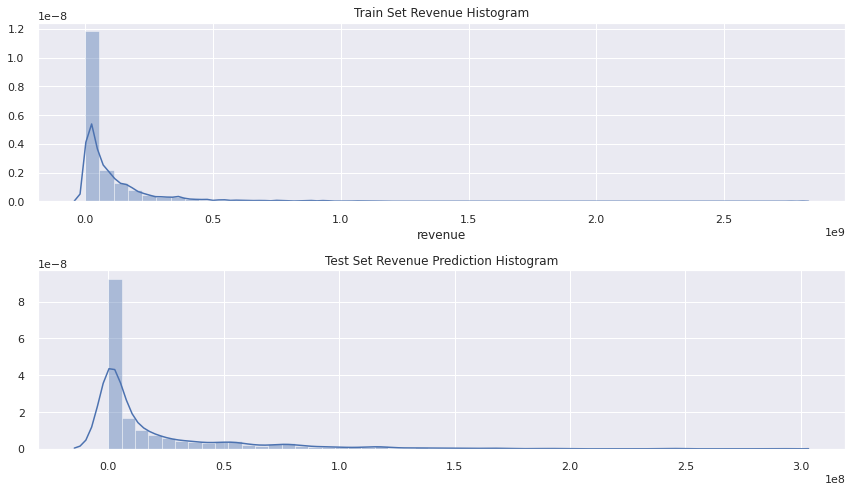

In [124]:
# split the data
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, shuffle=False, test_size=10,  train_size=100)

predictions_extra_trees_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    clf_extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

    clf_extra_trees.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_extra_trees_test += clf_extra_trees.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_test = np.expm1(predictions_extra_trees_test)
print()
print(predictions_extra_trees_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

Extra Trees Model Tuning

[link text](https://)Finds the best hyper-parameters for Extra Trees Model, so we can get the best results from training as possible. 

In [125]:
def bayesian_tuning_extra_trees(xtrain, ytrain):
  
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = ExtraTreesRegressor(
            random_state=42 #150
        ),
        search_spaces = {
            'n_estimators': (10, 500), #10, 500
            'max_depth': (1, 12), #1, 12
            'min_samples_split': (2, 20), #2, 20
            'min_samples_leaf': (1, 20) #1, 20
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True, #True
            random_state=42 #150
        ),
        scoring = 'neg_mean_squared_error',
        n_jobs = 4, #4
        n_iter = 12,  #12 
        verbose = 0,
        refit = True, #True
        random_state = 42 #150
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_extra_trees = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_extra_trees
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_extra_trees = bayesian_tuning_extra_trees(xtrain, ytrain)

Model #1
Best score: -30.8794
Best params: OrderedDict([('max_depth', 6), ('min_samples_leaf', 15), ('min_samples_split', 19), ('n_estimators', 165)])

Model #2
Best score: -30.8794
Best params: OrderedDict([('max_depth', 6), ('min_samples_leaf', 15), ('min_samples_split', 19), ('n_estimators', 165)])

Model #3
Best score: -30.8794
Best params: OrderedDict([('max_depth', 6), ('min_samples_leaf', 15), ('min_samples_split', 19), ('n_estimators', 165)])

Model #4
Best score: -27.356
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 4), ('min_samples_split', 13), ('n_estimators', 403)])

Model #5
Best score: -25.7865
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 9), ('min_samples_split', 11), ('n_estimators', 361)])

Model #6
Best score: -25.7865
Best params: OrderedDict([('max_depth', 10), ('min_samples_leaf', 9), ('min_samples_split', 11), ('n_estimators', 361)])

Model #7
Best score: -25.7865
Best params: OrderedDict([('max_depth', 10), ('min_samples_

In [126]:
#returns best hyper-parameters from bayesian tuning
result_extra_trees.best_params_

OrderedDict([('max_depth', 11),
             ('min_samples_leaf', 9),
             ('min_samples_split', 9),
             ('n_estimators', 359)])

Extra Trees Training after tuning


Fold: 0

Fold 0 xvalid rmse: 2.0122129055489384

Fold: 1

Fold 1 xvalid rmse: 1.8870526737548317

Fold: 2

Fold 2 xvalid rmse: 2.1661032655218544

Fold: 3

Fold 3 xvalid rmse: 1.5424951704310317

Fold: 4

Fold 4 xvalid rmse: 1.643298887701234

[5.28722112e+07 7.70336555e+07 6.61060962e+07 5.28521728e+07
 6.69606687e+07 7.61837377e+07 4.57474373e+07 2.30770560e+07
 2.53592502e+07 3.11208462e+07 3.27088898e+07 5.09485271e+07
 3.07587058e+07 5.35821935e+07 2.01394677e+07 4.49984860e+07
 3.20017777e+07 6.76415954e+07 2.09162262e+07 6.64898705e+07
 4.36138723e+07 7.13935634e+07 5.06848124e+07 4.91724044e+07
 6.08170919e+07 5.49233217e+07 8.51888923e+07 4.86172570e+07
 3.65395514e+07 4.71521244e+07 2.46806292e+07 2.27041865e+07
 4.88352341e+07 7.08614800e+07 6.12594914e+07 1.45752007e+07
 7.02548333e+07 2.51411322e+07 4.52502821e+07 4.81109106e+07
 4.65761047e+07 5.76366002e+07 6.86426524e+07 2.34399861e+07
 4.94363902e+07 7.11662067e+07 3.41681335e+07 1.31130729e+07
 3.25954464e+07 5.34864

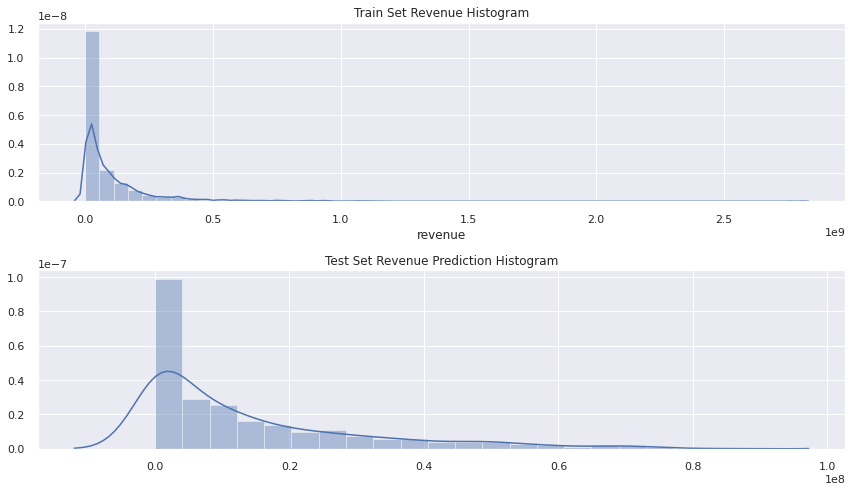

In [129]:
# split the data
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, shuffle=False, test_size=10,  train_size=100)

predictions_extra_trees_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0
                                          #True
folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()

    #will be using best parameters from bayesian tuning for best results
    clf_extra_trees_tuned = ExtraTreesRegressor(random_state=42, 
                                                max_depth = result_extra_trees.best_params_['max_depth'], 
                                                min_samples_leaf = result_extra_trees.best_params_['min_samples_leaf'], 
                                                min_samples_split = result_extra_trees.best_params_['min_samples_split'], 
                                                n_estimators = result_extra_trees.best_params_['n_estimators'])

    clf_extra_trees_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    oof_rmse += rmse_valid

    predictions_extra_trees_tuned_test += clf_extra_trees_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_tuned_test = np.expm1(predictions_extra_trees_tuned_test)
print()
print(predictions_extra_trees_tuned_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

Light LGBM Boosting


Fold: 0

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 3.58507	valid_1's rmse: 5.42437
[200]	training's rmse: 2.97014	valid_1's rmse: 5.79942
[300]	training's rmse: 2.58272	valid_1's rmse: 6.09086
[400]	training's rmse: 2.27324	valid_1's rmse: 6.36363
[500]	training's rmse: 2.02968	valid_1's rmse: 6.60688
[600]	training's rmse: 1.81976	valid_1's rmse: 6.7879
[700]	training's rmse: 1.65144	valid_1's rmse: 6.93864
[800]	training's rmse: 1.48655	valid_1's rmse: 7.05309
[900]	training's rmse: 1.35419	valid_1's rmse: 7.18575
[1000]	training's rmse: 1.24267	valid_1's rmse: 7.259
Early stopping, best iteration is:
[12]	training's rmse: 5.10632	valid_1's rmse: 4.81808
Fold 0 xvalid rmse: 4.629917295494039

Fold: 1

Training until validation scores don't improve for 1000 rounds.
[100]	training's rmse: 3.49804	valid_1's rmse: 5.35804
[200]	training's rmse: 3.013	valid_1's rmse: 5.47323
[300]	training's rmse: 2.66553	valid_1's rmse: 5.46169
[400]	training

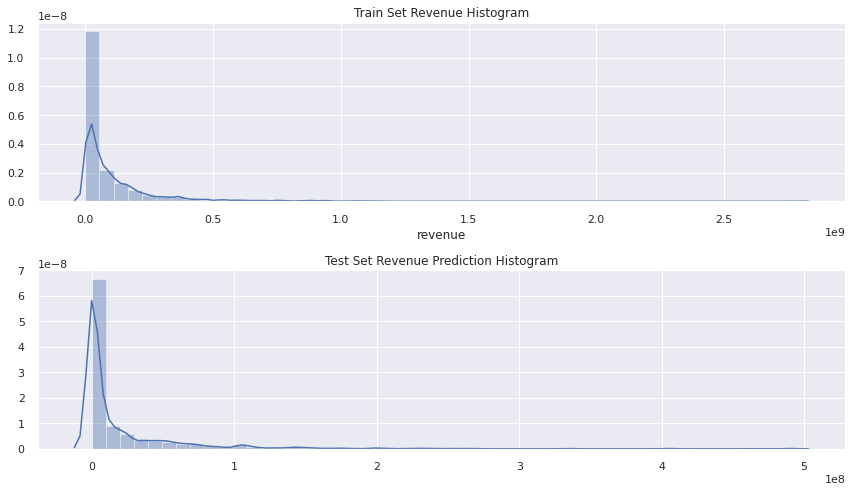

In [102]:
params = {
    "metric": 'rmse',
    "verbosity": -1
}

# split the data                  
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=10,  train_size=100)

predictions_test_lgb = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits
                                        #False               #42
folds = KFold(n_splits=num_of_splits, shuffle=True, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    print()
                                                      #20000       #4          #-1
    model_lgb = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
    model_lgb.fit(xtrain_stra, ytrain_stra, 
        eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], eval_metric='rmse',
        verbose=100, early_stopping_rounds=1000)
              #100             #1000
    predictions_valid = model_lgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold" ,num_fold, "xvalid rmse:", rmse_valid)
    num_fold = num_fold + 1
    
    oof_rmse += rmse_valid

    predictions_test_lgb += model_lgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_lgb = np.expm1(predictions_test_lgb)
print()
print(predictions_test_lgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_lgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()



Training Model using catboost

In [83]:

# split the data                  
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, shuffle=False, test_size=10,  train_size=100)

In [84]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [85]:
#define the catboost model
model=CatBoostRegressor(iterations=70, 
depth=6, 
#random_strength=5, 
#random_state=42, 
task_type='GPU',
#use_best_model=False, 
l2_leaf_reg= 2, 
bootstrap_type='Bayesian',
bagging_temperature=1,
min_data_in_leaf=1,
max_leaves=31,
#one_hot_max_size='2', # N/A or 255 or 2 or 10
fold_permutation_block=10,
leaf_estimation_method='Newton', #Gradient or Exact or Newton
leaf_estimation_iterations=1,
fold_len_multiplier=2, # defualt is 2
approx_on_full_history=False, #True or False
boosting_type='Ordered', #Orderd or Plain
score_function='Cosine', #NewtonL2 or Cosine or L2
penalties_coefficient=1,
boost_from_average=False, # True or RSME, Quantile, MAPE, False or all other loss functions
leaf_estimation_backtracking='AnyImprovement', #No, AnyImprovement or Armijo
grow_policy='SymmetricTree', #SymmetricTree or Depthwise
learning_rate=0.1, 
loss_function='RMSE')



In [86]:
#fit the model to be trained
model.fit(xtrain, ytrain,cat_features=categorical_features_indices, eval_set=(xvalid, yvalid), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 14.3182501	test: 14.1056439	best: 14.1056439 (0)	total: 17ms	remaining: 1.18s
1:	learn: 13.2488362	test: 13.0033147	best: 13.0033147 (1)	total: 28.5ms	remaining: 970ms
2:	learn: 12.2510762	test: 11.9916119	best: 11.9916119 (2)	total: 41.5ms	remaining: 927ms
3:	learn: 11.2870722	test: 10.9377952	best: 10.9377952 (3)	total: 52.8ms	remaining: 871ms
4:	learn: 10.4252089	test: 10.2364502	best: 10.2364502 (4)	total: 67.7ms	remaining: 880ms
5:	learn: 9.6572977	test: 9.3686170	best: 9.3686170 (5)	total: 82.3ms	remaining: 878ms
6:	learn: 8.9687247	test: 8.5845924	best: 8.5845924 (6)	total: 92.8ms	remaining: 835ms
7:	learn: 8.4478773	test: 8.0194983	best: 8.0194983 (7)	total: 103ms	remaining: 797ms
8:	learn: 7.9150242	test: 7.4990429	best: 7.4990429 (8)	total: 128ms	remaining: 864ms
9:	learn: 7.4776496	test: 7.1465734	best: 7.1465734 (9)	total: 143ms	remaining: 859ms
10:	learn: 7.0256902	test: 6.6201440	best: 6.6201440 (10)	total: 155ms	remaining: 833ms
11:	learn: 6.6649378	test: 6.146

In [87]:
#make prediction with catboost model
preds = model.predict(test_df[columns_for_training], verbose=True)

preds

array([17.12461541, 18.20217834, 18.18873665, 18.29286797, 17.28983818,
       18.84758323, 18.50504054, 15.68290069, 17.98566355, 16.27668569,
       14.84903361, 17.00986954, 16.77643406, 18.13657288, 18.10870923,
       15.8418241 , 16.34254239, 15.93346131, 17.35870492, 13.45492855,
       18.03110126, 16.42572536, 17.73947403, 17.32233031, 17.80664256,
       16.68043637, 18.35416792, 18.45826088, 17.70749845, 16.51546856,
       15.41858563, 18.35771002, 18.21640035, 16.03695537, 18.12095821,
       15.25359849, 17.24512446, 18.55813895, 12.30474186, 17.73969521,
       16.38099784, 15.2331373 , 17.11671254, 15.2520606 , 18.21851444,
       17.20415162, 18.08807914, 17.12058802, 18.65138249, 18.13953038,
       18.17548234, 17.11614139, 18.18945791, 12.92067164, 12.46047683,
       17.72564348, 17.86771029, 16.89813923, 16.32410608, 18.43445026,
       18.50327264, 17.90124308, 15.35849172, 17.40987673, 13.28716573,
       13.48168575, 16.75648138, 18.26933313, 16.36676205, 17.10

In [88]:
# this function helps find the best optimal parameters for ML Model
def catboost_grid_search(): 
    print()
    print(format('How to find optimal parameters for CatBoost using GridSearchCV for Regression','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from catboost import CatBoostRegressor

    # load the iris datasets
    #dataset = datasets.load_boston()
    #X = dataset.data; y = dataset.target
    xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, shuffle=False, test_size=10,  train_size=100)

    model = CatBoostRegressor()
    parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100],
                  'l2_leaf_reg': [1, 3, 5, 7, 9]
                 }
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
    grid.fit(xtrain, ytrain)    

    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
    print("\n ========================================================")


#function call for grid search
catboost_grid_search()


**How to find optimal parameters for CatBoost using GridSearchCV for Regression***
0:	learn: 7.2707437	total: 1.98ms	remaining: 196ms
1:	learn: 7.0659310	total: 3.91ms	remaining: 191ms
2:	learn: 6.9011960	total: 5.56ms	remaining: 180ms
3:	learn: 6.7247785	total: 7.05ms	remaining: 169ms
4:	learn: 6.5736312	total: 8.54ms	remaining: 162ms
5:	learn: 6.4077062	total: 9.97ms	remaining: 156ms
6:	learn: 6.2641181	total: 11.1ms	remaining: 147ms
7:	learn: 6.1224719	total: 12.6ms	remaining: 145ms
8:	learn: 5.9328381	total: 13.2ms	remaining: 133ms
9:	learn: 5.8145059	total: 14.6ms	remaining: 131ms
10:	learn: 5.6615987	total: 16ms	remaining: 129ms
11:	learn: 5.5220516	total: 17ms	remaining: 124ms
12:	learn: 5.4397971	total: 17.6ms	remaining: 118ms
13:	learn: 5.3306930	total: 19.1ms	remaining: 117ms
14:	learn: 5.2540759	total: 20.6ms	remaining: 117ms
15:	learn: 5.1443812	total: 22.1ms	remaining: 116ms
16:	learn: 5.0498050	total: 23.5ms	remaining: 115ms
17:	learn: 4.9515803	total: 24.8ms	remaining: 

In [89]:
#define catboost randimized search to help optimzie ML model

def catboost_randomized_search_cv(): 
    print()
    print(format('How to find optimal parameters for CatBoost using GridSearchCV for Classification','*^82'))    
    
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import RandomizedSearchCV
    from scipy.stats import uniform as sp_randFloat
    from scipy.stats import randint as sp_randInt    
    from catboost import CatBoostClassifier

    #split data
    xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, shuffle=False, test_size=10,  train_size=100)

    model = CatBoostRegressor()
    parameters = {'depth'         : sp_randInt(4, 10),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 100),
                  'l2_leaf_reg'    : sp_randInt(1, 10)
                 }
    
    randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
    randm.fit(xtrain, ytrain)

    # Results from Random Search
    print("\n========================================================")
    print(" Results from Random Search " )
    print("========================================================")    
    
    print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
    print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
    print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
    print("\n ========================================================")

#call function
catboost_randomized_search_cv()


How to find optimal parameters for CatBoost using GridSearchCV for Classification*
0:	learn: 6.8105724	total: 3.25ms	remaining: 68.3ms
1:	learn: 6.1404708	total: 6.43ms	remaining: 64.3ms
2:	learn: 5.6119950	total: 8.97ms	remaining: 56.8ms
3:	learn: 5.0784617	total: 11.4ms	remaining: 51.3ms
4:	learn: 4.7199379	total: 13.9ms	remaining: 47.4ms
5:	learn: 4.2762732	total: 16.4ms	remaining: 43.8ms
6:	learn: 4.1555185	total: 18.8ms	remaining: 40.3ms
7:	learn: 3.8306392	total: 21.4ms	remaining: 37.5ms
8:	learn: 3.6048163	total: 24ms	remaining: 34.7ms
9:	learn: 3.3217137	total: 26.5ms	remaining: 31.8ms
10:	learn: 3.1001022	total: 29ms	remaining: 29ms
11:	learn: 2.9440750	total: 31.6ms	remaining: 26.4ms
12:	learn: 2.7886249	total: 34.1ms	remaining: 23.6ms
13:	learn: 2.5528401	total: 36.4ms	remaining: 20.8ms
14:	learn: 2.4069100	total: 39ms	remaining: 18.2ms
15:	learn: 2.2392486	total: 41.5ms	remaining: 15.6ms
16:	learn: 2.0688581	total: 44.5ms	remaining: 13.1ms
17:	learn: 1.8790358	total: 46.9m